In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [12]:
data = pd.read_csv('dataset/real_estate.csv')

data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [13]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


# discovery

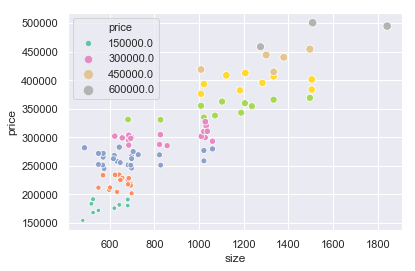

In [4]:
axS = sns.scatterplot(x='size', y='price', hue='price', size='price', palette='Set2', data=data)


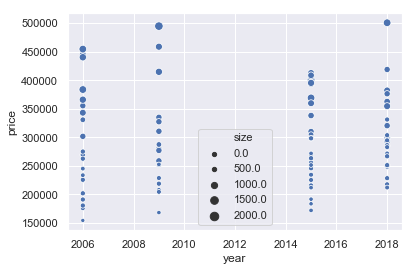

In [5]:
axY = sns.scatterplot(x='year', y='price', size='size', palette='Set2', data=data)


# regression

In [15]:
# define dependent and independent features
y = data['price']
x = data[['size', 'year']]

x.shape, y.shape


((100, 2), (100,))

In [16]:
# do regression w/ default settings, copy_X, fit_intercept, n_jobs, normalize

reg = LinearRegression()

reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# get regression results
print('r-squared:', reg.score(x, y),
      '\ncoefficients: ', reg.coef_,
      '\nintercept:', reg.intercept_)

r-squared: 0.7764803683276793 
coefficients:  [ 227.70085401 2916.78532684] 
intercept: -5772267.017463278


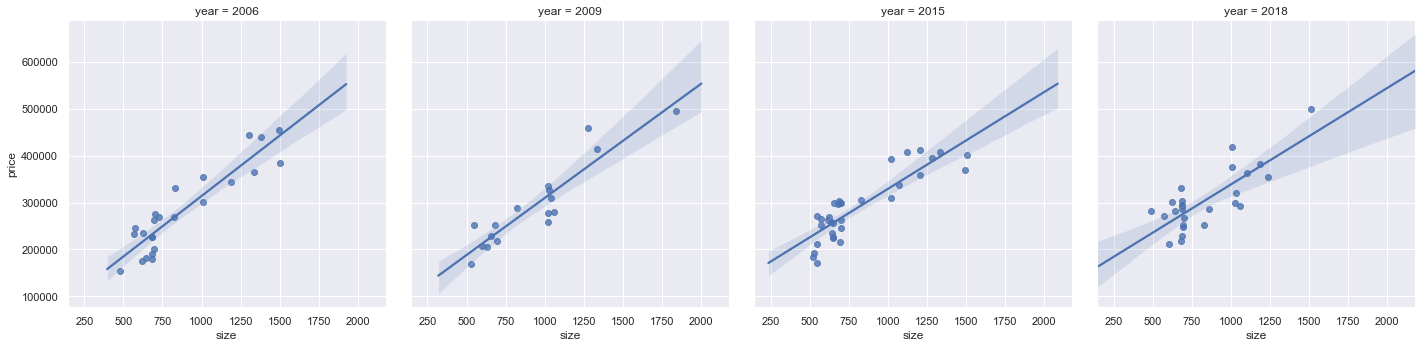

In [36]:
# sns.regplot(x="size", y="price", data=data);
sns.lmplot(x="size", y="price", col='year', data=data);


# validations

In [32]:
test_data = pd.DataFrame(data=[[750, 2016]], columns=['SAT', 'year'])
test_data

,SAT,year
0,750,2016


In [33]:
test_data['predicted_price'] = reg.predict(test_data)
test_data

,SAT,year,predicted_price
0,750,2016,278747.841948
